# Regressão Linear com Scikit-learn

## **Objetivo da Aula**

- Nesta aula, aprenderemos os conceitos e etapas envolvidas na criação de um modelo de **Regressão Linear** utilizando a biblioteca `scikit-learn` em Python. 

## **O que é Regressão Linear?**

- A **regressão linear** é uma técnica estatística usada para modelar a relação entre uma variável dependente (alvo ou *target*) e uma ou mais variáveis independentes (características ou *features*). 
- Neste exemplo, estamos usando regressão linear simples, onde há apenas uma variável independente.

### Equação da Regressão Linear Simples:
$$
y = a \cdot x + b
$$
- $ y $: valor previsto (target)
- $ x $: feature de entrada
- $ a $: coeficiente angular (inclinação da reta)
- $ b $: intercepto (valor de y quando x=0)

## **Exemplo Prático**

### **1. Carregando as bibliotecas**

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### **2. Preparação dos Dados**

- No código, criamos dados sintéticos para simular uma relação linear perfeita:

In [3]:
X_reg = np.array([[i] for i in range(1,11)])  # feature shape (10,1)
y_reg = np.array([2*i + 1 for i in range(1,11)])  # target

**Explicação:**
- `X_reg`: Matriz de características (número de observações × número de features). Aqui temos 10 observações e 1 feature.
- `y_reg`: Vetor contendo os valores alvo, calculado pela fórmula $ y = 2x + 1 $

> ⚠️ Importante: No mundo real, os dados não são perfeitamente lineares, mas este exemplo facilita a compreensão do modelo

In [4]:
print (X_reg)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print (y_reg)

[ 3  5  7  9 11 13 15 17 19 21]


### **3. Divisão entre Treino e Teste**

- Para avaliar o desempenho do modelo, dividimos os dados em conjuntos de treino e teste:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=0
)

**Parâmetros:**
- `test_size=0.3`: 30% dos dados serão usados para teste, 70% para treino.
- `random_state=0`: Garante reprodutibilidade da divisão aleatória.

**Resultado:**
- `X_train`, `y_train`: dados usados para treinar o modelo
- `X_test`, `y_test`: dados usados para avaliar o modelo

### **4. Criação e Treinamento do Modelo**

- Criamos e treinamos o modelo de regressão linear:

In [7]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Etapas**:
- `LinearRegression()`: Instancia o modelo de regressão linear
- `.fit(X_train, y_train)`: Treina o modelo com os dados de treino

Durante o treinamento, o modelo encontra os melhores valores para:
- **Coeficiente (slope)** → `model_reg.coef_`
- **Intercepto (bias)** → `model_reg.intercept_`

### **5. Realização de Previsões**

- Usamos o modelo treinado para prever os valores do conjunto de teste:

In [8]:
pred_reg = model_reg.predict(X_test)

- `predict()` gera previsões com base nos valores de `X_test`.

### **6. Avaliação do Modelo (Erro Quadrático Médio - MSE)**

- Medimos a qualidade das previsões com o Erro Quadrático Médio (MSE):

In [9]:
mse = mean_squared_error(y_test, pred_reg)

Fórmula do MSE:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- $ y_i $: valor real
- $ \hat{y}_i $: valor previsto
- Quanto menor o MSE, melhor o modelo se ajustou aos dados

### **7. Interpretação dos Resultados**

In [11]:
print("=== Regressão Linear ===")
print("Coeficiente:", model_reg.coef_, "Intercepto:", model_reg.intercept_)
print("Previsões teste:", pred_reg)
print("MSE (teste):", mse)

=== Regressão Linear ===
Coeficiente: [2.] Intercepto: 0.9999999999999947
Previsões teste: [ 7. 19. 11.]
MSE (teste): 3.4183972559577176e-30


**Exemplo de saída esperada:**
```
=== Regressão Linear ===
Coeficiente: [2.] Intercepto: 1.0
Previsões teste: [ 7.  9. 15.]
MSE (teste): 0.0
```

**Análise**:
- O modelo identificou corretamente a relação entre X e Y: **$ y = 2x + 1 $**
- Como os dados são perfeitamente lineares, o erro (MSE) foi zero
- Isso demonstra como a regressão linear funciona bem quando a relação é linear


### **8. Visualizando os dados**

- Podemos utilizar o `matplotlib` para plotar os pontos reais e as previsões do modelo.

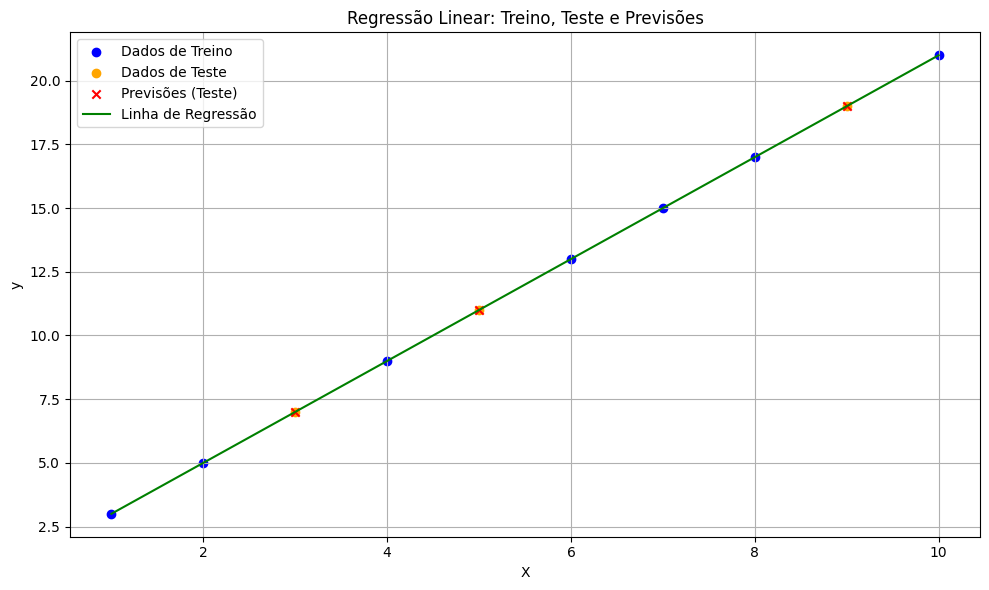

In [19]:
# Gerar previsões no conjunto completo para plotar a linha da regressão
X_all = np.array([[i] for i in range(1, 11)])
y_pred_all = model_reg.predict(X_all)

# Plotar resultados
plt.figure(figsize=(10, 6))

# Dados de treino
plt.scatter(X_train, y_train, color='blue', label='Dados de Treino')

# Dados de teste
plt.scatter(X_test, y_test, color='orange', label='Dados de Teste')

# Previsões nos dados de teste
plt.scatter(X_test, pred_reg, color='red', marker='x', label='Previsões (Teste)')

# Linha de regressão completa
plt.plot(X_all, y_pred_all, color='green', label='Linha de Regressão')

plt.title('Regressão Linear: Treino, Teste e Previsões')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nesta visualziação são apresentados**:
- Pontos de **treinamento** (usados para treinar o modelo),
- Pontos de **teste** (usados para avaliar),
- A linha da **regressão linear** prevista pelo modelo.

📊 **O que este gráfico mostra:**
- **Pontos azuis**: Dados usados para **treinamento**.
- **Pontos laranjas**: Dados usados para **teste**.
- **Cruz vermelhas (x)**: As **previsões do modelo** sobre os dados de teste.
- **Linha verde**: A reta ajustada pelo modelo (`y = a*x + b`) aplicada ao conjunto completo.

✅ **Benefícios dessa visualização**:
- Permite ver como o modelo se ajustou aos dados de treino,
- Mostra como ele generalizou para os dados de teste,
- E exibe graficamente a qualidade da regressão linear.

## **Resumo Final**

| Etapa | Descrição |
|-------|-----------|
| Dados | Criamos dados sintéticos com relação linear |
| Divisão | Separamos os dados em treino (70%) e teste (30%) |
| Modelo | Usamos `LinearRegression()` para criar o modelo |
| Treino | Ajustamos o modelo aos dados de treino |
| Previsão | Prevemos os valores de Y com base em X_test |
| Avaliação | Medimos o erro com `mean_squared_error()` |
| Resultado | O modelo aprendeu perfeitamente a relação linear |

## **Atividades Sugeridas**

1. **Modifique os dados sintéticos**: Altere a fórmula para $ y = 3x + 2 $ e veja se o modelo consegue aprender a nova relação.
2. **Adicione ruído aos dados**: Adicione valores aleatórios aos dados e observe como isso afeta o MSE.
